***| Cristian Meichtry (62529) | Juan Martin Rodriguez (62563) |*** 

In [95]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dl-itba-cifar-100-2024-q-1/y_train_fine.npy
/kaggle/input/dl-itba-cifar-100-2024-q-1/y_train_coarse.npy
/kaggle/input/dl-itba-cifar-100-2024-q-1/fine_label_names.pck
/kaggle/input/dl-itba-cifar-100-2024-q-1/coarse_label_names.pck
/kaggle/input/dl-itba-cifar-100-2024-q-1/x_test.npy
/kaggle/input/dl-itba-cifar-100-2024-q-1/x_train.npy


In [96]:
x_train = np.load("/kaggle/input/dl-itba-cifar-100-2024-q-1/x_train.npy")/255.
x_test = np.load("/kaggle/input/dl-itba-cifar-100-2024-q-1/x_test.npy")/255.
y_train_coarse = np.load("/kaggle/input/dl-itba-cifar-100-2024-q-1/y_train_coarse.npy")
y_train_fine = np.load("/kaggle/input/dl-itba-cifar-100-2024-q-1/y_train_fine.npy")

print(y_train_coarse)
print(y_train_fine)

[11 15  4 ...  8  7  1]
[19 29  0 ...  3  7 73]


In [97]:
import pickle

with open("/kaggle/input/dl-itba-cifar-100-2024-q-1/fine_label_names.pck", "rb") as f:
    labels_fine = pickle.load(f)
with open("/kaggle/input/dl-itba-cifar-100-2024-q-1/coarse_label_names.pck", "rb") as f:
    labels_coarse = pickle.load(f)

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_train_cv, y_train, y_train_cv = train_test_split(np.load("/kaggle/input/dl-itba-cifar-100-2024-q-1/x_train.npy")/255., y_train_fine, test_size=0.2, random_state=25)

In [99]:
print(len(x_train))
print(len(x_train_cv))
print(len(y_train))
print(len(y_train_cv))

40000
10000
40000
10000


In [100]:
from matplotlib import pyplot as plt
#%load_ext tensorboard
import keras_cv

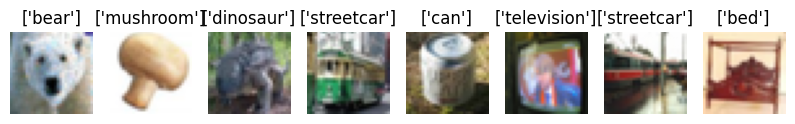

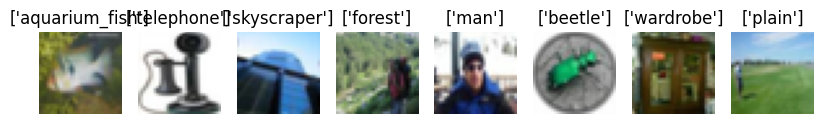

In [101]:
#This code snippet visualizes samples from the training dataset.
#It displays two rows of images with their corresponding labels, each consisting of eight images.

plt.figure(figsize=(10, 10))
cant = 8
for i in range(cant):
    plt.subplot(1, cant, i+1)
    plt.imshow(x_train[i]) #Display the i-th image from the training set
    plt.title([labels_fine[y_train[i]] ])
    plt.axis('off')
plt.show()
plt.figure(figsize=(10, 10))

for i in range(cant):
    plt.subplot(1, cant, i+1)
    plt.imshow(x_train[i+cant]) #Display the image at index i + cant in x_train
    plt.title([labels_fine[y_train[i+cant]]])
    plt.axis('off')

In [102]:
len(x_train) 

40000

In [103]:
x_train[0].ndim

3

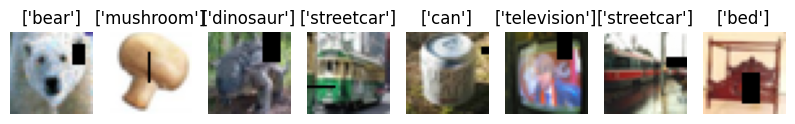

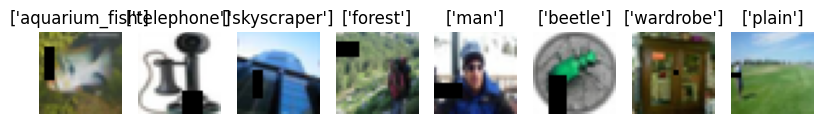

In [104]:
# Define a RandomCutout augmentation layer from keras_cv
# with cutout proportions of 0.5 (50% width and 50% height cut out)

random_cutout = keras_cv.layers.RandomCutout(0.5, 0.5)

# Apply RandomCutout augmentation to the first 5000 images of x_train
x_train_cutout = random_cutout(x_train[:5000])

# Extract the corresponding labels for the augmented images
y_train_cuout = y_train[:5000]

plt.figure(figsize=(10, 10))
cant = 8
for i in range(cant):
    plt.subplot(1, cant, i+1)
    plt.imshow(x_train_cutout[i])
    plt.title([labels_fine[y_train_cuout[i]]])
    plt.axis('off')
plt.show()
plt.figure(figsize=(10, 10))

for i in range(cant):
    plt.subplot(1, cant, i+1)
    plt.imshow(x_train_cutout[i+cant])
    plt.title([labels_fine[y_train_cuout[i+cant]]])
    plt.axis('off')

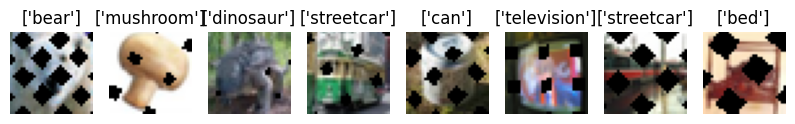

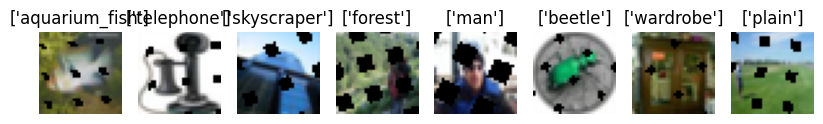

In [105]:
# Create a GridMask augmentation layer from keras_cv with a fixed seed for reproducibility

grid_mask = keras_cv.layers.GridMask(seed=22)

# Apply the GridMask augmentation to the first 100 images in x_train
x_train_grid_mask = grid_mask(x_train[:100])

# Select labels for first 100 images as corresponding labels for the augmented set
y_train_grid_mask = y_train[:100]

plt.figure(figsize=(10, 10))
cant = 8
for i in range(cant):
    plt.subplot(1, cant, i+1)
    plt.imshow(x_train_grid_mask[i])
    plt.title([labels_fine[y_train_grid_mask[i]]])
    plt.axis('off')
plt.show()
plt.figure(figsize=(10, 10))

for i in range(cant):
    plt.subplot(1, cant, i+1)
    plt.imshow(x_train_grid_mask[i+cant])
    plt.title([labels_fine[y_train_grid_mask[i+cant]]])
    plt.axis('off')

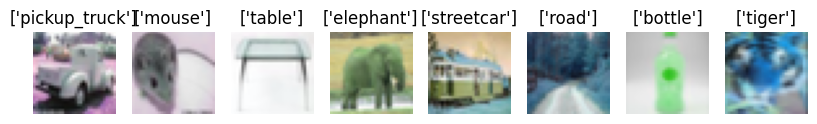

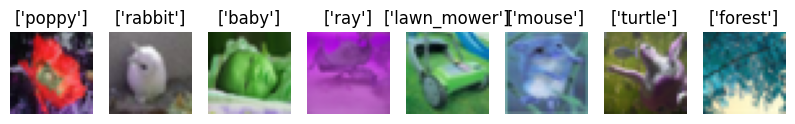

In [106]:
# Create a ChannelShuffle augmentation layer from keras_cv with a fixed seed for reproducibility
channel_shuffle = keras_cv.layers.ChannelShuffle(seed=22)

# Apply the ChannelShuffle augmentation to a subset of images in x_train
x_train_channel_shuffle = channel_shuffle(x_train[1000:1500])

# Select labels corresponding to the augmented images
y_train_channel_shuffle = y_train[1000:1500]

plt.figure(figsize=(10, 10))
cant = 8
for i in range(cant):
    plt.subplot(1, cant, i+1)
    plt.imshow(x_train_channel_shuffle[i])
    plt.title([labels_fine[y_train_channel_shuffle[i]]])
    plt.axis('off')
plt.show()
plt.figure(figsize=(10, 10))

for i in range(cant):
    plt.subplot(1, cant, i+1)
    plt.imshow(x_train_channel_shuffle[i +cant])
    plt.title([labels_fine[y_train_channel_shuffle[i+cant]]])
    plt.axis('off')

In [107]:
# Combine the original training images (x_train) with the augmented images (x_train_cutout)
x_train_final = np.concatenate([x_train, x_train_cutout])

# Combine the original labels (y_train) with the labels of the augmented images (y_train_cutout)
y_train_final = np.concatenate([y_train, y_train_cuout])

print(len(x_train_final))
print(len(y_train_final))

45000
45000


In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GaussianNoise
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt

In [109]:
x_train.shape

(40000, 32, 32, 3)

In [110]:
# This code sets up an instance of the ImageDataGenerator class for data augmentation,
# applying a series of transformations to expand the training dataset.

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=50,          # Rotates images randomly within a range of 50 degrees
    horizontal_flip=True,       # Flips images horizontally at random (vertical flip is not applied)
    zoom_range=0.25,            # Zooms images randomly up to 25% for variability
    shear_range=0.25            # Applies a random shear transformation up to 25%
)
datagen.fit(x_train_final)            # Fits the generator to the training data to adapt the transformations

# Although additional adjustments were tested, such as changing brightness levels and making small shifts to images, 
# this setup was found to be the most optimal.

**A large number of models have been created to observe the changes in the neural network's performance, whether in terms of accuracy, overfitting, or other parameters. Below is a brief description of some of the analyzed models (not representing the entirety of evaluated cases, only the most interesting ones), along with the results obtained for each.**



***Model 1:*** Basic model with a single layer. This layer contains 100 neurons with softmax activation and no normalization. No overfitting was observed, but the model achieved a validation accuracy of 0.19.



***Model 2:*** Basic model with a single layer. This layer contains 2000 neurons with ReLU activation and no normalization. The learning rate was reduced from 0.001 to 0.0001. No overfitting was observed, but the model performed very poorly, achieving a validation accuracy of 0.0118.



***Model 3:*** Basic model with a single layer. This layer contains 2000 neurons with SeLU activation, dropout of 0.3, and batch normalization. The learning rate is set to 0.0001. No overfitting was observed, but the model performed poorly, achieving a validation accuracy of 0.0663.



***Model 4:*** Multi-layer model starting with 2000 neurons (SeLU activation), Gaussian noise, Dropout of 0.3, and batch normalization. A second Dense layer of 2500 neurons (SeLU activation) includes similar Gaussian noise, Dropout of 0.4, and batch normalization. The output layer has 100 neurons with softmax activation. The learning rate is 0.0001. No overfitting was observed, achieving a validation accuracy of 0.3067. Training was stopped early due to early stopping.



***Model 5:*** Multi-layer model with three Dense layers of 2500 neurons each, using SeLU activation and Glorot Uniform initialization. The model incorporates Gaussian noise, Dropout of 0.3, and batch normalization after each Dense layer. The second Dense layer includes L2 regularization on weights, bias, and activity. The output layer has 100 neurons with softmax activation. The learning rate is set to 0.0001. Signs of overfitting were observed, with training accuracy of 0.4417 and validation accuracy of 0.3298.



***Model 6:*** Multi-layer model with three Dense layers (1500, 2500, and 1500 neurons), using SeLU activation and Glorot Uniform initialization. The model includes Gaussian noise and batch normalization after each Dense layer, but without Dropout. The second Dense layer also includes L2 regularization on weights, bias, and activity. The output layer has 100 neurons with softmax activation. The learning rate is set to 0.0001. Early signs of overfitting were observed, with training accuracy of 0.6059, validation accuracy of 0.3371, and validation loss of 2.9116



***Model 7:*** Complex multi-layer model with four Dense layers (1500, 2500, 2500, and 1500 neurons), using SeLU activation and Glorot Uniform initialization. The model includes Gaussian noise with varied std (scaled for each layer), Dropout (0.3 or 0.4), and batch normalization after each Dense layer. The second and third Dense layers also feature L2 regularization on weights, bias, and activity. The output layer has 100 neurons with softmax activation. The learning rate is set to 0.0002. Early overfitting signs were observed with training accuracy of 0.4451, loss of 2.1935, validation accuracy of 0.3270, and validation loss of 2.9668.



***Model 8:*** Deep multi-layer model with five Dense layers (1500, 2500, 4000, 2500, and 1500 neurons), using SeLU activation and Glorot Uniform initialization. The model incorporates Gaussian noise with varied std, Dropout (0.3 to 0.6), and batch normalization after each Dense layer. The second through fourth Dense layers feature L2 regularization on weights, bias, and activity. The output layer has 100 neurons with softmax activation. The learning rate is set to 0.0002. Early overfitting is indicated by training accuracy of 0.3350, loss of 2.7720, validation accuracy of 0.3104, and validation loss of 3.0330.



***Model 9:*** Deep multi-layer model with six Dense layers (1500, 2500, 2000, 1500, 1000, 1000 neurons), using SeLU activation and Glorot Normal initialization. Each Dense layer includes Gaussian noise with progressively reduced std, Dropout (from 0.2 to 0.5), and batch normalization. Several layers also employ L2 regularization on weights, bias, and activity. The output layer has 100 neurons with softmax activation. The learning rate is set to 0.0002. No overfitting observed, with training accuracy of 0.2743, loss of 3.0063, validation accuracy of 0.2953, and validation loss of 2.9810.



***Model 10***: Extensive model with eight dense layers (ranging from 1000 to 3000 neurons), using SeLU activation and Glorot Normal initialization. The model lacks dropout and regularization layers, resulting in severe overfitting, with training accuracy of 0.7738 and validation accuracy of only 0.2193. Validation loss was also notably high at 5.3965. The learning rate is set at 0.0002.



***Model 11***: Multi-layer network with five Dense layers (ranging from 1000 to 3000 neurons), using SeLU activation, Glorot Uniform initialization, and L2 regularization (1e-5) on all layers. A Dropout rate of 0.1 is applied across hidden layers to mitigate overfitting, along with Batch Normalization. The optimizer is configured with Exponential Decay, starting at a low learning rate of 1e-5, which decays by half every 10,000 steps. After 100 epochs with early stopping, the model achieved a training accuracy of 0.2996 and validation accuracy of 0.2901, with val_loss at 3.0604, suggesting only slight overfitting but limited overall model improvement.



***Model 12***: A sequential model with a five-layer Dense architecture (2048, 1024, 512, and 256 neurons), utilizing ReLU activation and Glorot Normal initialization. Each Dense layer is followed by Batch Normalization and 0.5 Dropout to reduce overfitting. The model was trained using Adam optimizer with a learning rate of 0.0002. The model achieved a training accuracy of 0.2002 and validation accuracy of 0.2455 with a validation loss of 3.1027. The limited performance suggests underfitting, despite regularization strategies.



***Model 13***: This model is a sequential network with four dense layers, structured with 3000-5000-5000-3000 neurons and SELU activation. The first three layers include Gaussian noise with a standard deviation based on the input data, Batch Normalization, and Dropout (20%, 30%, and 50%, respectively). Additionally, L2 regularization with a very low factor (1e-7) is applied to reduce overfitting. The final layer is a 100-unit softmax for classification, trained with the Adam optimizer at an initial learning rate of 0.0002. After training, the model achieved a training accuracy of 0.6067 and a validation accuracy of 0.3324, with a validation loss of 3.2274. These results indicate significant overfitting, with validation accuracy notably lower than training accuracy.



***Model 14***: This model employs a deep architecture initialized with the Glorot Uniform method, consisting of several dense layers featuring SELU activation functions. The first two layers utilize 10,000 neurons, followed by a layer with 5,000 neurons, and two subsequent layers with 2,500 and 1,000 neurons, respectively. The final layer is a softmax output layer with 100 neurons for multi-class classification. Notably, dropout is set to zero for all layers, allowing the model to fully utilize its capacity without regularization. Batch normalization is applied in the penultimate layer to enhance training stability. Despite achieving an accuracy of 0.675 on the training set, the validation accuracy of 0.303 indicates potential overfitting.



***Model 15***: A sequential MLP architecture initialized with Glorot Uniform, featuring six Dense layers with varying neuron counts: 10000, 10000, 5000, 2500, 1000, and 1000 neurons. All layers use SELU activation, with Gaussian Noise and Dropout (0.3) applied in most layers to reduce overfitting, accompanied by Batch Normalization. The last layer employs a softmax activation with 100 neurons. L2 regularization (1e-6) is applied in several layers. The model achieved a training accuracy of 0.278 and a validation accuracy of 0.27, indicating challenges with overfitting and potential room for improvement.



***Model 16***: A sequential MLP architecture consisting of six Dense layers (2000, 2500, 2000, 2000, 1000, and 1000 neurons), employing SELU activation and Glorot Uniform initialization. The model incorporates Gaussian Noise and Dropout (rates of 0.3 to 0.5) after most layers, along with Batch Normalization to mitigate overfitting. Compiled with the Adam optimizer and a learning rate of 0.0001, the model achieved a training accuracy of 0.2789 and a validation accuracy of 0.3125, with a validation loss of 2.9020. The performance indicates potential underfitting, despite the applied regularization techniques.



***Model 17***: A sequential MLP architecture consisting of five Dense layers (2048, 2000, 1500, 1000, and 1000 neurons), employing SELU activation and Glorot Uniform initialization. The model incorporates Gaussian Noise and Dropout (rates of 0.3 to 0.5) after most layers, along with Batch Normalization to mitigate overfitting. Compiled with the Adam optimizer and a learning rate of 0.0002, the model achieved a training accuracy of 0.2836 and a validation accuracy of 0.3095, with a validation loss of 2.817. The performance indicates potential underfitting, despite the applied regularization techniques.



***Model 18***: This model is a deep MLP with five Dense layers (2048, 2000, 1500, 1000, and 1000 neurons), using SWISH activation and Glorot Uniform initialization. Gaussian Noise, Dropout (0.3–0.5), and Batch Normalization were employed to reduce overfitting. Compiled with the Adam optimizer (learning rate 0.0002), it achieved training and validation accuracy of 0.2975 and a validation loss of 2.9575, indicating limited generalization capacity.



***Model 19***: A five-layer MLP with Dense layers (2048, 2000, 1500, 1000, and 1000 neurons) using SWISH activation and Glorot Uniform initialization. Gaussian Noise, Dropout (0.3–0.5), and Batch Normalization are used to control overfitting. Compiled with Adam (learning rate 0.0002) and a batch size of 16, it reached 0.2808 training accuracy, 0.29 validation accuracy, and a validation loss of 2.9330, suggesting possible underfitting.



***Model 20***: This model uses a five-layer MLP (2048, 2000, 1500, 1000, 1000 neurons), SWISH activation, and Glorot Uniform initialization. To reduce overfitting, Gaussian Noise, Dropout (0.3–0.5), and Batch Normalization were added. Compiled with Adam (learning rate 0.0002) and batch size of 256, it achieved 0.3343 training accuracy and 0.3164 validation accuracy, with a validation loss of 2.9330, showing improved learning but potential overfitting.



***Model 21***: A five-layer MLP architecture (2048, 2000, 1500, 1000, and 1000 neurons) with SWISH activation and Glorot Uniform initialization. It incorporates Gaussian Noise, Dropout (0.3–0.5), and Batch Normalization. Using Adam (learning rate 0.0002) and batch size 512, it achieved training accuracy of 0.2806, validation accuracy of 0.3010, and validation loss of 2.9330, highlighting stable but limited generalization.



***Final Model***: This model features a four-layer MLP with Dense layers (2000, 2000, 1500, 1000 neurons) using Swish activation and Glorot Uniform initialization. To manage overfitting, Gaussian Noise, Dropout (0.3–0.5), Batch Normalization, and L2 regularization are applied throughout. Compiled with Adam (learning rate 0.0002), it employs sparse categorical cross-entropy for multi-class classification across 100 classes. This version achieved consistent accuracy while maintaining resource efficiency, providing coherent results without excessive resource consumption.


***As a disclaimer, although it was mentioned in class that this is not the most optimal approach, dropout and batch normalization techniques were applied on the same layer, as this led to a slight improvement in performance, raising the results without causing overfitting or underfitting.***

***About the Swish activation function***

Swish is of the form $f(x) = x \cdot \sigma(x)$

Upon investigation, it was found that this form of activation provides better results than RELU for image classification because the transition is smoother and thus convergence is more effective relative to low error. In addition, since it is non-zero for $ x < 0$, these small negative values can provide useful data for capturing patterns. However, a higher computational cost is to be expected when using Swish.

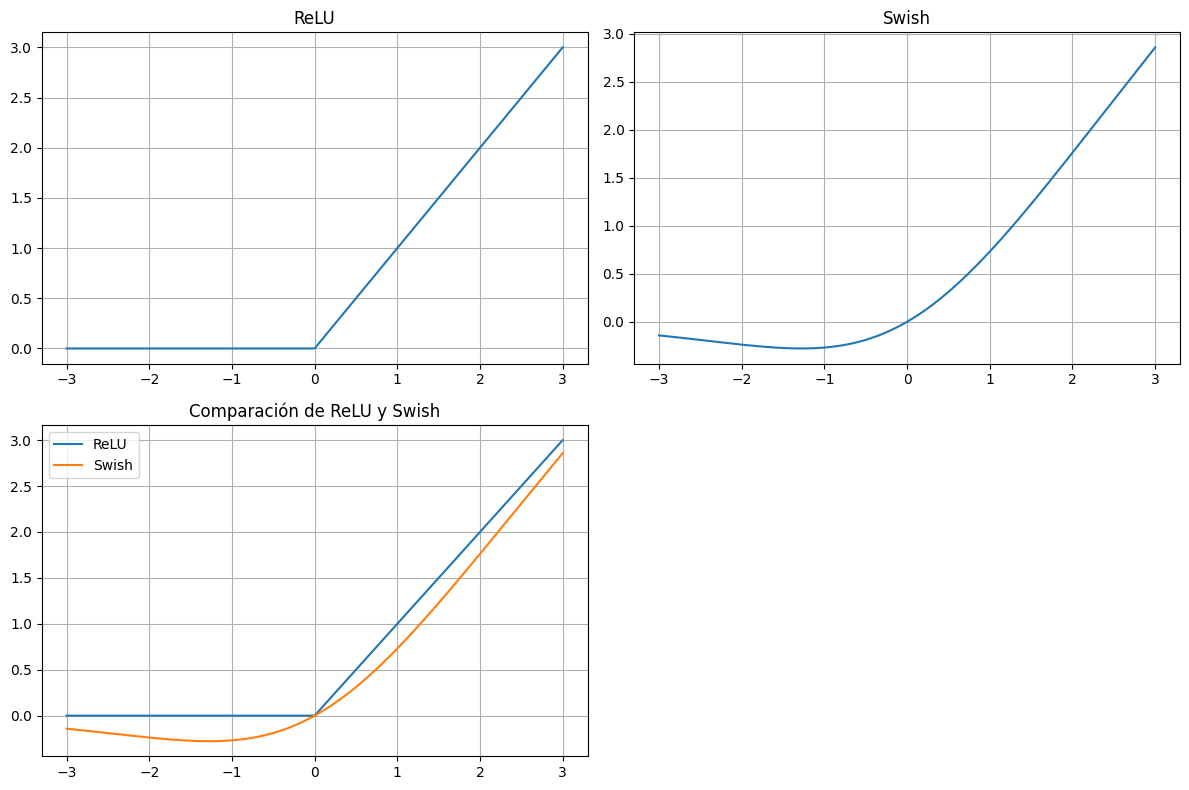

In [111]:
def relu(x):
    return np.maximum(0, x)

def swish(x):
    return x / (1.0 + np.exp(-x))

x = np.linspace(-3, 3, 400)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, relu(x))
plt.title('ReLU')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(x, swish(x))
plt.title('Swish')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, swish(x), label='Swish')
plt.title('Comparación de ReLU y Swish')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#As a disclaimer, although it was mentioned in class that this is not the most optimal approach,
# dropout and batch normalization techniques were applied on the same layer, as this led to a slight
# improvement in performance, raising the results without causing overfitting or underfitting.
from tensorflow.keras.initializers import GlorotNormal, GlorotUniform

initializer = GlorotUniform()

layer = Dense(3, kernel_initializer=initializer)

std = np.std(x_train)/8

model = Sequential()

model.add(Flatten(input_shape=(32,32,3)))

model.add(Dense(2000, activation="swish",kernel_initializer = initializer))
model.add(GaussianNoise(std))
model.add(Dropout(rate=0.3))
model.add(BatchNormalization())

model.add(Dense(2000, activation="swish",
                    kernel_initializer = initializer,
                  kernel_regularizer=L2(1e-6),
                 bias_regularizer=L2(1e-5),
                activity_regularizer=L2(1e-7)))
model.add(GaussianNoise(std/2))
model.add(Dropout(rate=0.4))
model.add(BatchNormalization())

model.add(Dense(1500, activation="swish",
                    kernel_initializer = initializer,
                  kernel_regularizer=L2(1e-6),
                 bias_regularizer=L2(1e-6),
                activity_regularizer=L2(1e-7)))
model.add(GaussianNoise(std/4))
model.add(Dropout(rate=0.4))
model.add(BatchNormalization())

model.add(Dense(1000, activation="swish",
                    kernel_initializer = initializer,
                  kernel_regularizer=L2(1e-6),
                 bias_regularizer=L2(1e-6),
                activity_regularizer=L2(1e-7)))
model.add(GaussianNoise(std/8))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())

model.add(Dense(100, activation="softmax",kernel_initializer = initializer))

model.compile(loss="sparse_categorical_crossentropy", metrics = ["accuracy"], optimizer = Adam(learning_rate=0.0002))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2000)           │     6,146,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_9                │ (None, 2000)           │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 2000)           │         8,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2000)           │     4,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_10               │ (None, 2000)           │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 2000)           │         8,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1500)           │     3,001,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_11               │ (None, 1500)           │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 1500)           │         6,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1000)           │     1,501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_12               │ (None, 1000)           │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 1000)           │         4,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │       100,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,776,600 (56.37 MB)

 Trainable params: 14,763,600 (56.32 MB)

 Non-trainable params: 13,000 (50.78 KB)

In [81]:
# Sets up learning rate reduction on plateau to optimize training stability.

rlrop = ReduceLROnPlateau(
    monitor="val_accuracy",  # Monitors validation accuracy to detect plateaus
    factor=0.5,              # Reduces the learning rate by half when plateauing
    patience=3,              # Waits for 3 epochs without improvement before reducing the learning rate
    verbose=1,               # Enables detailed output for each reduction in learning rate
    min_lr=1e-5              # Defines a minimum learning rate to prevent over-reduction
)

In [82]:
# Sets up a model checkpoint to save the best weights during training.

mc = ModelCheckpoint(
    "best_weights.weights.h5",   # Path to save the model weights file.
    monitor="val_accuracy",      # Monitors validation accuracy to determine when to save
    verbose=1,                   # Prints a message each time the model weights are saved
    save_best_only=True,         # Saves only if validation accuracy improves, keeping the best weights
    save_weights_only=True       # Saves only the model weights, not the full model
)

In [83]:
# Sets up early stopping to monitor the validation accuracy during training.

es = EarlyStopping(
    monitor="val_accuracy",       # Tracks validation accuracy to determine stopping point
    patience=50,                  # High patience value (40 epochs) to enable longer training
    verbose=1,                    # Prints messages to indicate when early stopping is triggered
    restore_best_weights=True     # Restores model weights from the best validation accuracy epoch
)

In [84]:
tb = TensorBoard(
    log_dir="logs",
)

In [85]:
# Trains the model using the fit method and logs the training history.

history = model.fit(
    datagen.flow(x_train_final, y_train_final, batch_size=256),  # Feeds augmented data in batches of 256 from the training set.
    batch_size=256,                                  
    epochs=100,                                     # Specifies the maximum number of training epochs.
    validation_data=(x_train_cv, y_train_cv),       # Uses validation set to track the model’s performance.
    callbacks=[                                     
        rlrop,  # Reduces learning rate on plateau if validation performance stops improving
        es,     # Implements early stopping with patience, restoring the best weights
        mc,     # Saves the model weights when the best validation accuracy is reached
        tb,     # Enables tensorboard logging for visualizing the training process
    ]
)

# Different batch sizes (512, 256, 128, 64, and 32) were tested, with the best results achieved using a batch size of 256.

Epoch 1/100
173/176 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.0262 - loss: 5.1226
Epoch 1: val_accuracy improved from -inf to 0.09670, saving model to best_weights.weights.h5
176/176 ━━━━━━━━━━━━━━━━━━━━ 64s 252ms/step - accuracy: 0.0265 - loss: 5.1173 - val_accuracy: 0.0967 - val_loss: 4.0005 - learning_rate: 2.0000e-04
Epoch 2/100
173/176 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.0612 - loss: 4.5499
Epoch 2: val_accuracy improved from 0.09670 to 0.11730, saving model to best_weights.weights.h5
176/176 ━━━━━━━━━━━━━━━━━━━━ 28s 151ms/step - accuracy: 0.0613 - loss: 4.5483 - val_accuracy: 0.1173 - val_loss: 3.8855 - learning_rate: 2.0000e-04
Epoch 3/100
173/176 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.0767 - loss: 4.3205
Epoch 3: val_accuracy improved from 0.11730 to 0.13880, saving model to best_weights.weights.h5
176/176 ━━━━━━━━━━━━━━━━━━━━ 28s 151ms/step - accuracy: 0.0768 - loss: 4.3198 - val_accuracy: 0.1388 - val_loss: 3.8119 - learning_rate: 2.0000e-04
Epoc

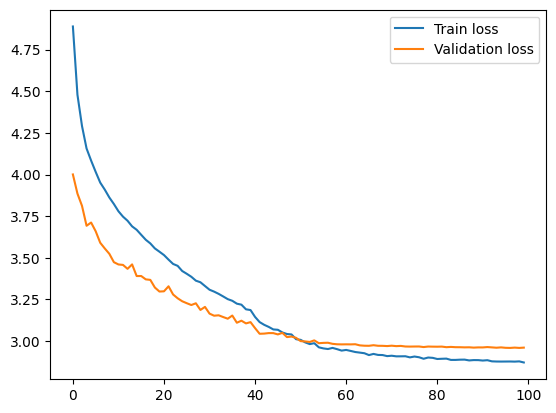

In [86]:
plt.plot(history.history["loss"], label="Train loss")

plt.plot(history.history["val_loss"], label="Validation loss")

plt.legend()

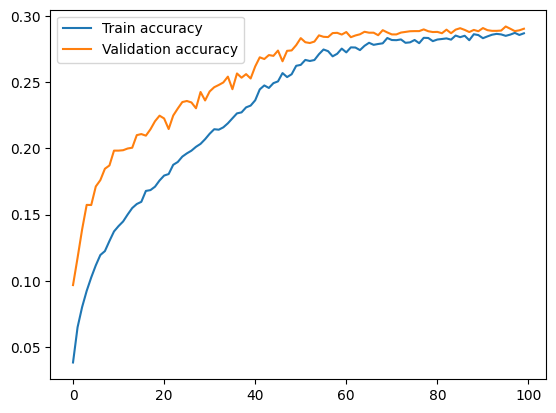

In [87]:
plt.plot(history.history["accuracy"], label="Train accuracy")

plt.plot(history.history["val_accuracy"], label="Validation accuracy")

plt.legend()

In [88]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [89]:
predictions = predictions.argmax(axis=1)

In [90]:
predictions

array([71, 38, 15, ..., 51, 34,  0])

In [91]:
df = pd.DataFrame(predictions, columns=["Label"])

In [92]:
df.index.name = "Id"

In [93]:
df.head()

,Label
Id,
0,71
1,38
2,15
3,10
4,71


In [94]:
df.to_csv("submission.csv")

In conclusion, a consistent result when using MLPs for this task reached an accuracy around 0.29. Regarding batch size, larger batch sizes led to better generalization, although increasing the size beyond a certain point did not yield significant improvements. In terms of neuron count, a high number of neurons did not improve model performance, and, without adequate regularization, led to substantial overfitting.



Swish activation functions provided the best results, enabling more effective convergence compared to other activations. Both Glorot Uniform and Glorot Normal initializers were tested and produced similar outcomes, suggesting that the choice between them is not critical for this model.



In the training phase, different levels of Dropout, L2 and L1 regularization, and Gaussian noise were experimented with. It was observed that improper tuning of these variables can significantly increase overfitting, highlighting the importance of carefully adjusting these hyperparameters. Additionally, image preprocessing with data augmentation techniques was applied to expand the dataset, contributing to better generalization of the model.